In [3]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np


2024-08-01 08:41:50.382007: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 08:41:50.419286: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 08:41:50.419319: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 08:41:50.420263: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 08:41:50.426114: I tensorflow/core/platform/cpu_feature_guar

In [4]:
# 訓練用とテスト用のデータパスを設定する
train_data_path = '/home/jovyan/work/1/data/data/cats_and_dogs/train'
test_data_path = '/home/jovyan/work/1/data/data/cats_and_dogs/validation'


In [5]:
# ImageDataGeneratorをインスタンス化し、データ拡張パラメータを追加する
train_datagen = ImageDataGenerator(
    rescale=1./255,          # 画像をスケール変換
    rotation_range=30,       # 画像をランダムに回転させる度数範囲
    width_shift_range=0.1,   # 画像を水平にランダムにシフトする範囲（全体の幅の比率）
    height_shift_range=0.1,  # 画像を垂直にランダムにシフトする範囲（全体の高さの比率）
    shear_range=0.3,         # ランダムにシアー変換を加える強度
    zoom_range=0.2,          # 画像をランダムにズームする範囲
    horizontal_flip=True,    # 画像を水平にランダムに反転させる
    fill_mode='nearest'      # 新たに作成されたピクセルを埋める方法
)

# テストデータにはデータ拡張を適用しない（リスケールのみ）
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# データ生成器を作成
train_generator = train_datagen.flow_from_directory(
    train_data_path,             # トレーニングデータのフォルダパス
    target_size=(150, 150),      # 画像のリサイズ後のサイズ
    batch_size=32,
    class_mode='binary'          # 2値分類
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

print(train_generator.class_indices)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [7]:
# モデルを構築
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

2024-08-01 08:41:53.751200: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7910 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 1g.10gb, pci bus id: 0000:57:00.0, compute capability: 8.0


In [8]:
# 最適化器を設定
sgd = optimizers.SGD(learning_rate=0.1)

# モデルをコンパイル
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

# モデルを訓練
train_samples = train_generator.samples
test_samples = test_generator.samples

# .fitを使用
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // 32, 
    epochs=80,
    verbose=1,
    validation_data=test_generator,
    validation_steps=test_samples // 32  
)


# モデルを保存
model.save('model.h5')

Epoch 1/80


2024-08-01 08:41:58.736495: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-08-01 08:42:00.336802: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-08-01 08:42:04.043068: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f32c801f680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-01 08:42:04.043100: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100 80GB PCIe MIG 1g.10gb, Compute Capability 8.0
I0000 00:00:1722501724.112528    5271 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 [==============================] - 47s 311ms/step - loss: 0.2514 - accuracy: 0.4959 - val_loss: 0.2487 - val_accuracy: 0.5363
Epoch 2/80
62/62 [==============================] - 9s 146ms/step - loss: 0.2494 - accuracy: 0.5239 - val_loss: 0.2471 - val_accuracy: 0.5413
Epoch 3/80
62/62 [==============================] - 9s 144ms/step - loss: 0.2484 - accuracy: 0.5508 - val_loss: 0.2456 - val_accuracy: 0.6421
Epoch 4/80
62/62 [==============================] - 9s 145ms/step - loss: 0.2468 - accuracy: 0.5661 - val_loss: 0.2447 - val_accuracy: 0.5081
Epoch 5/80
62/62 [==============================] - 9s 145ms/step - loss: 0.2447 - accuracy: 0.5788 - val_loss: 0.2400 - val_accuracy: 0.6310
Epoch 6/80
62/62 [==============================] - 9s 145ms/step - loss: 0.2443 - accuracy: 0.5722 - val_loss: 0.2348 - val_accuracy: 0.5877
Epoch 7/80
62/62 [==============================] - 9s 145ms/step - loss: 0.2420 - accuracy: 0.5762 - val_loss: 0.2444 - val_accuracy: 0.5333
Epoch 8/80
62/62

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


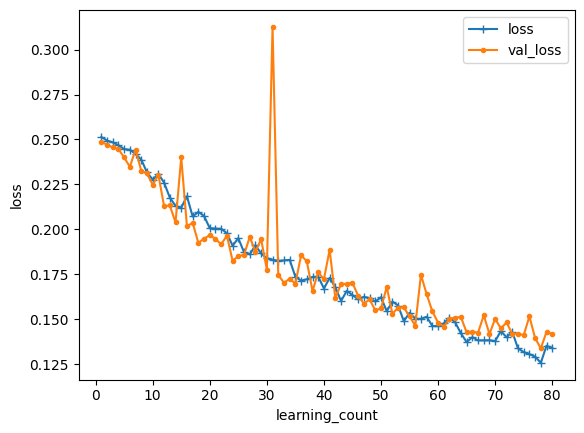

In [9]:
# 損失グラフを描画
loss = history.history['loss']
val_loss = history.history['val_loss']

learning_count = len(loss) + 1

plt.plot(range(1, learning_count),loss,marker='+',label='loss')
plt.plot(range(1, learning_count),val_loss,marker='.',label='val_loss')
plt.legend(loc = 'best', fontsize=10)
plt.xlabel('learning_count')
plt.ylabel('loss')
plt.show()

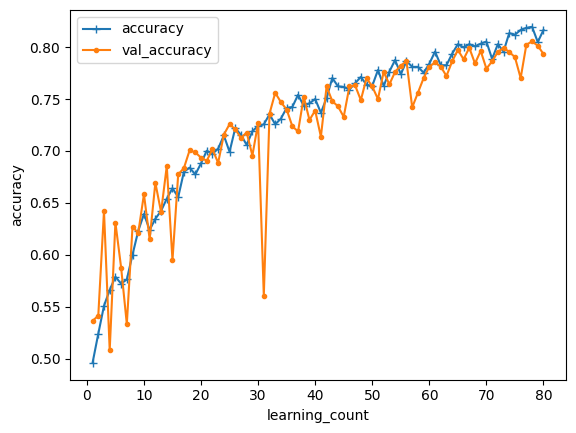

In [10]:
# 正確率グラフを描画
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, learning_count),accuracy,marker='+',label='accuracy')
plt.plot(range(1, learning_count),val_accuracy,marker='.',label='val_accuracy')
plt.legend(loc = 'best', fontsize=10)
plt.xlabel('learning_count')
plt.ylabel('accuracy')
plt.show()